In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
X = pd.read_csv('TrainData.csv')
y = pd.read_csv('selectivity.csv')
X.replace(0.1,0.0,inplace=True)
X.head()
X.dropna()

,Elevation LB,Elevation UB,Aspect LB,Aspect UB,Slope LB,Slope UB,Horizontal_Distance_To_Hydrology LB,Horizontal_Distance_To_Hydrology UB,Vertical_Distance_To_Hydrology LB,Vertical_Distance_To_Hydrology UB,Horizontal_Distance_To_Roadways LB,Horizontal_Distance_To_Roadways UB,Hillshade_9am LB,Hillshade_9am UB,Hillshade_Noon LB,Hillshade_Noon UB,Hillshade_3pm LB,Hillshade_3pm UB,Horizontal_Distance_To_Fire_Points LB,Horizontal_Distance_To_Fire_Points UB
0,3396.0,3726.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2645.0,3033.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2131.0,3247.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3625.0,3809.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3626.0,3642.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20455,3829.0,3857.0,41.0,221.0,0.0,14.0,1001.0,1029.0,-62.0,484.0,6879.0,6985.0,0.0,14.0,14.0,46.0,186.0,254.0,7111.0,7145.0
20456,3604.0,3686.0,31.0,61.0,25.0,37.0,16.0,44.0,49.0,593.0,6886.0,6918.0,24.0,32.0,1.0,3.0,211.0,249.0,2385.0,2659.0
20457,3387.0,3451.0,280.0,340.0,13.0,25.0,465.0,1039.0,38.0,172.0,5314.0,5596.0,3.0,145.0,4.0,222.0,215.0,229.0,1810.0,5316.0
20458,3775.0,3787.0,16.0,22.0,12.0,44.0,1300.0,1388.0,396.0,498.0,3743.0,4859.0,85.0,161.0,174.0,222.0,242.0,248.0,5207.0,6447.0


In [3]:
#convert to numpy arrays
X = X.values
y = y.values #uaing this for model training

In [4]:
epsilon = 1e-10
y_log = np.log2(y + epsilon) #log transformation of selectivity labels using log base 2.

In [5]:
#create the model
model = RandomForestRegressor()

In [6]:
# Train the model
X_train, X_test, y_train, y_test = train_test_split(X, y_log, test_size=0.2)  # Log-transformed y
y_train = y_train.ravel()  # Flattening y_train
y_test = y_test.ravel()  # Flattening y_test

model.fit(X_train, y_train)


RandomForestRegressor()

In [7]:
# Calculate training score
training_score = model.score(X_train, y_train)

print("Training Score:", training_score)


Training Score: 0.9910556000168734


In [8]:
# Make predictions
y_pred = model.predict(X_test)

# Calculate MSE
mse = mean_squared_error(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)

Mean Squared Error (MSE): 5.788013398303203


In [9]:
from sklearn.metrics import r2_score

# Calculate R-squared score
r2 = r2_score(y_test, y_pred)

print("R-squared Score:", r2)


R-squared Score: 0.9364630366129051


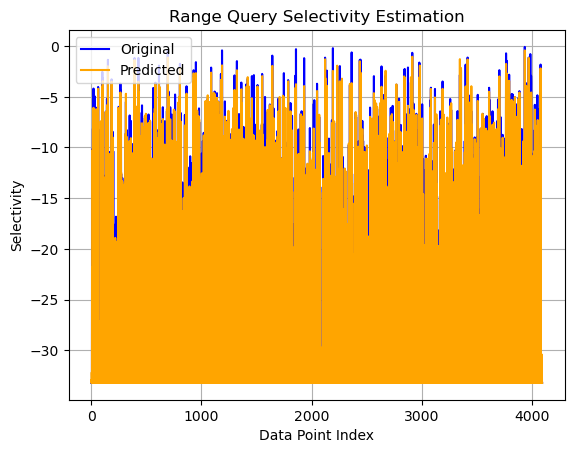

In [10]:
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="Original", color='blue')
plt.plot(x_ax, y_pred, label="Predicted", color='orange')
plt.title("Range Query Selectivity Estimation")
plt.xlabel("Data Point Index")
plt.ylabel("Selectivity")
plt.legend()
plt.grid(True)
plt.show()
